<a href="https://colab.research.google.com/github/nayaksom/720c_python_project/blob/master/720C_Final_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 720C - Introduction to Python for Business Analytics
# Final Project
# Analysis of Netflix Data
#
# Group Name:           Netflix and Chill
# Group Members:        1. Guneet Thakral
#                       2. Lokesh Batra
#                       3. Nishant Agarwal
#                       4. Shivani Deshmukh
#                       5. Som Nayak

In [0]:
# ------------
# Dependencies
# ------------

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
plt.style.use('ggplot')

# -------------
# Color Palette
# -------------

c_red = '#DB0404'
c_maroon = '#830908'
c_black = '#1A0D0D'
c_dark_grey = '#EDEDEB'
c_light_grey = '#7B7C7C'

In [0]:
# ------------------------------------
# Load csv data files from public urls
# ------------------------------------

url_csv_netflix_data = "https://raw.githubusercontent.com/nayaksom/720c_python_project/master/netflix_data.csv"
url_csv_imdb_ratings = "https://raw.githubusercontent.com/nayaksom/720c_python_project/master/imdb_ratings.csv"

netflix_data_df = pd.read_csv(url_csv_netflix_data)
imdb_ratings_df = pd.read_csv(url_csv_imdb_ratings)

In [0]:
# -----------------------
# Create Output Directory
# -----------------------

current_directory = os.getcwd()
final_directory = os.path.join(current_directory, r'Output')
if not os.path.exists(final_directory):
   os.makedirs(final_directory)

In [5]:
netflix_data_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
# -----------------------------------
# Snapshot - Dataset 1 (netflix_data)
# -----------------------------------

netflix_data_count_df = pd.DataFrame(netflix_data_df.count())
netflix_data_count_df.reset_index(inplace=True)
netflix_data_count_df.insert(0, 'Columns', range(1, len(netflix_data_count_df) + 1))
netflix_data_count_df.rename(columns={'index': 'Column Name', 0: 'No. of Rows'}, inplace = True)
netflix_data_count_df

,Columns,Column Name,No. of Rows
0,1,show_id,6234
1,2,type,6234
2,3,title,6234
3,4,director,4265
4,5,cast,5664
5,6,country,5758
6,7,date_added,6223
7,8,release_year,6234
8,9,rating,6224
9,10,duration,6234


In [7]:
imdb_ratings_df.head()


,IMDB_titleID,IMDB_rating,IMDB_title_name
0,/title/tt9428190/,3.1 based on 235 user ratings,Norm of the North: King Sized Adventure (2019)
1,/title/tt6999080/,5.3 based on 15 user ratings,Jandino: Whatever it Takes (2016) (TV Special)
2,/title/tt1659175/,"7.8 based on 4,891 user ratings",Transformers Prime (2010) (TV Series)
3,/title/tt3604232/,6.0 based on 764 user ratings,Transformers: Robots in Disguise (2014) (TV S...
4,/title/tt6119504/,"5.2 based on 4,866 user ratings",#REALITYHIGH (2017)


In [8]:
# -----------------------------------
# Snapshot - Dataset 2 (IMDb Ratings)
# -----------------------------------

imdb_ratings_count_df = pd.DataFrame(imdb_ratings_df.count())
imdb_ratings_count_df.reset_index(inplace=True)
imdb_ratings_count_df.insert(0, 'Columns', range(1, len(imdb_ratings_count_df) + 1))
imdb_ratings_count_df.rename(columns={'index': 'Column Name', 0: 'No. of Rows'}, inplace = True)
imdb_ratings_count_df

,Columns,Column Name,No. of Rows
0,1,IMDB_titleID,6234
1,2,IMDB_rating,6234
2,3,IMDB_title_name,6234


In [9]:
# ----------------------------------------------
# Merge Netflix Data and IMDb Ratings dataframes
# ----------------------------------------------

netflix_df = pd.merge(netflix_data_df, imdb_ratings_df, left_index = True, right_index = True)

# Print uncleaned dataframe
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_titleID,IMDB_rating,IMDB_title_name
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,/title/tt9428190/,3.1 based on 235 user ratings,Norm of the North: King Sized Adventure (2019)
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,/title/tt6999080/,5.3 based on 15 user ratings,Jandino: Whatever it Takes (2016) (TV Special)
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",/title/tt1659175/,"7.8 based on 4,891 user ratings",Transformers Prime (2010) (TV Series)
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,/title/tt3604232/,6.0 based on 764 user ratings,Transformers: Robots in Disguise (2014) (TV S...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,/title/tt6119504/,"5.2 based on 4,866 user ratings",#REALITYHIGH (2017)


In [10]:
# ----------------------------------------------
# Data Cleaning of Merged 'netflix_df' dataframe
# ----------------------------------------------

# 1. Drop unnecessary columns

netflix_df.drop(['director', 'cast', 'description', 'duration', 'rating', 'IMDB_titleID', 'IMDB_title_name'], axis=1, inplace = True)

# 2. Rename 'listed_in' column to 'genre'

netflix_df.rename(columns={'listed_in': 'genre'}, inplace = True)

# 3. Save country and genre as list

all_genre = netflix_df['genre'].str.strip('()').str.split(', ')

netflix_df['country'] = netflix_df['country'].str.strip('()').str.split(', ')
netflix_df['genre'] =netflix_df['genre'].str.strip('()').str.split(', ')

# 4. Convert 'data_added' from string to date type

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip(), format='%B %d, %Y')

# 5. Replace 'Not Found' with NaN. Break down 'IMDB_rating' into rating and no. of users who rated

netflix_df['IMDB_rating'] = netflix_df['IMDB_rating'].replace('Not Found', np.nan)
netflix_df['IMDb_rating'] = netflix_df['IMDB_rating'].str[:3].astype(float)
netflix_df['IMDb_users'] = netflix_df['IMDB_rating'].str[13:].str[:-13].str.replace(',', '').astype(float)
netflix_df.drop(['IMDB_rating'], axis=1, inplace = True)

# 6. Clean up genre, since certain categories based on regions and languages are duplicating content

# Removing all characteristics that are not genres
genres_to_remove = ["International Movies", "International TV Shows", "Independent Movies", "Korean TV Shows", "Spanish-Language TV Shows", "Movies", "TV Shows", "British TV Shows"]
rowcount = 0

for row in netflix_df['genre']:
  row_clean = row
  for genre_rem in genres_to_remove:
    if (genre_rem in row_clean):
      row_clean.remove(genre_rem)

# Cleaning genre names
  row_clean = [a.replace('TV', '').replace('Movies', '').replace('Shows', '').replace('Features', '').replace('& Talk', '').replace('Series', '').replace('Kids\'', 'Children & Family').replace('Docuseries', 'Documentaries').replace('Classic & Cult', 'Classic').replace('Cult', 'Classic').replace('Music & Musicals', 'Musicals').replace('Mysteries', 'Thrillers').strip() for a in row_clean]

  netflix_df['genre'][rowcount] = row_clean
  rowcount += 1

# Print cleaned dataframe
netflix_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,show_id,type,title,country,date_added,release_year,genre,IMDb_rating,IMDb_users
0,81145628,Movie,Norm of the North: King Sized Adventure,"[United States, India, South Korea, China]",2019-09-09,2019,"[Children & Family, Comedies]",3.1,235.0
1,80117401,Movie,Jandino: Whatever it Takes,[United Kingdom],2016-09-09,2016,[Stand-Up Comedy],5.3,15.0
2,70234439,TV Show,Transformers Prime,[United States],2018-09-08,2013,[Children & Family],7.8,4891.0
3,80058654,TV Show,Transformers: Robots in Disguise,[United States],2018-09-08,2016,[Children & Family],6.0,764.0
4,80125979,Movie,#realityhigh,[United States],2017-09-08,2017,[Comedies],5.2,4866.0


In [11]:
# ---------------------------------
# Snapshot - Cleaned Merged Dataset
# ---------------------------------

netflix_count_df = pd.DataFrame(netflix_df.count())
netflix_count_df.reset_index(inplace=True)
netflix_count_df.insert(0, 'Columns', range(1, len(netflix_count_df) + 1))
netflix_count_df.rename(columns={'index': 'Column Name', 0: 'No. of Rows'}, inplace = True)
netflix_count_df

,Columns,Column Name,No. of Rows
0,1,show_id,6234
1,2,type,6234
2,3,title,6234
3,4,country,5758
4,5,date_added,6223
5,6,release_year,6234
6,7,genre,6234
7,8,IMDb_rating,5241
8,9,IMDb_users,5241


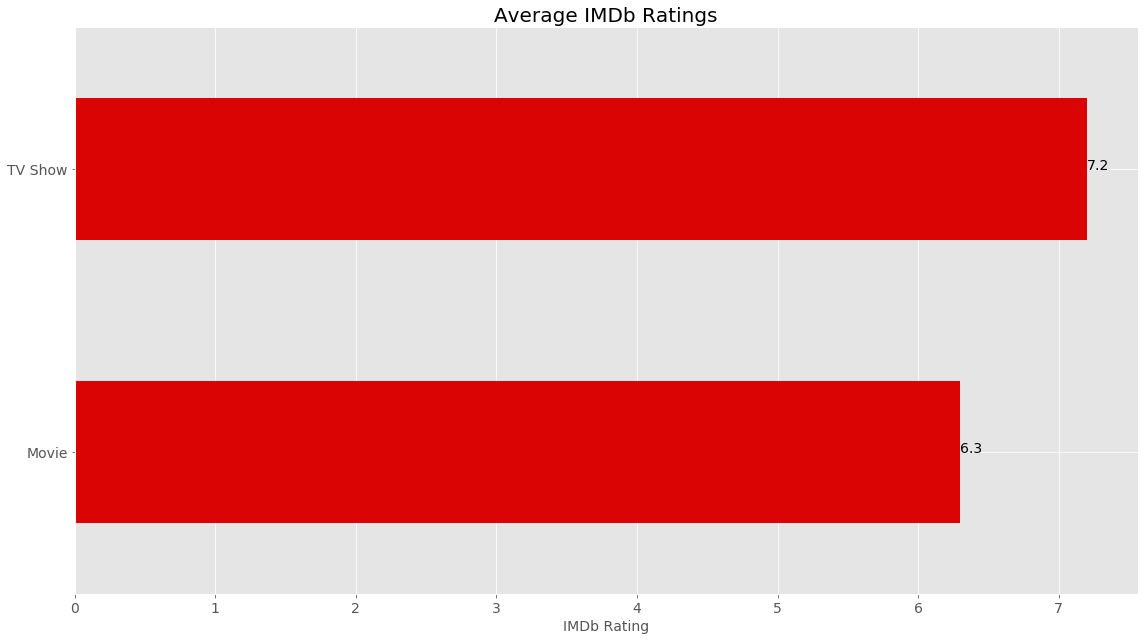

In [12]:
# ---------------------------------------------------------------
# Calculate average IMDb ratings for Netflix' TV shows and movies
# ---------------------------------------------------------------

# Prepare Data

# Drop the rows for which there are no 'IMDb_ratings' values, sort the table with ascending order of date
netflix_imdb_df = netflix_df.loc[:,['type','IMDb_rating']]
netflix_imdb_df = netflix_imdb_df.dropna(subset=['IMDb_rating'])
netflix_imdb_df.head()
netflix_imdb_grouped_df = netflix_imdb_df.groupby(['type']).mean().round(1)

# Draw

netflix_imdb_grouped_df.plot(kind='barh', legend=False, figsize=(16,9), color = c_red)

plt.title('Average IMDb Ratings', fontdict = {'fontsize' : 20})
plt.xlabel('IMDb Rating', fontdict = {'fontsize' : 14})
plt.ylabel('')
plt.tick_params(axis = 'both', labelsize = 14)

for index, value in enumerate(netflix_imdb_grouped_df['IMDb_rating']):
    plt.text(value, index, str(value), fontdict = {'fontsize' : 14})

plt.tight_layout()

# Save and Show

plt.savefig("Output/netflix_imdb_bargraph.jpg")
plt.show()

68.41514110565186
31.584855914115906


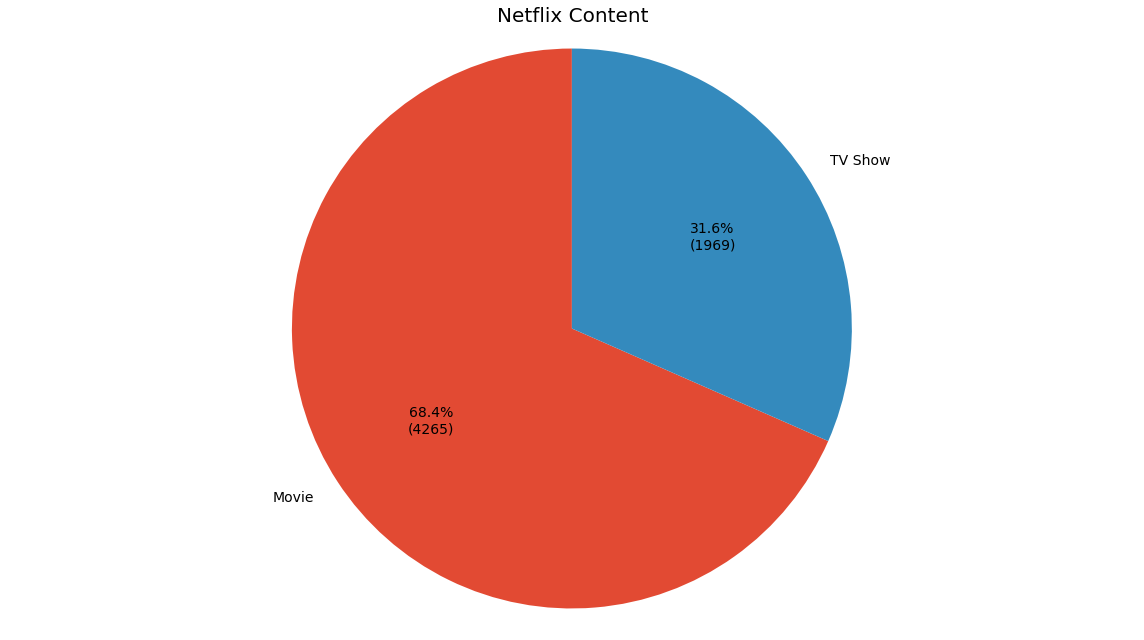

In [13]:
# ----------------------------------------------------------------------------
# Draw a Pie Chart to compare number of movies and TV shows in Netflix library
# ----------------------------------------------------------------------------

# Prepare Data

# This function allows you to show both percentange and actual values of each pie. Pass this function in autopct parameter
def show_num_per(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, netflix_df.shape[0]*x/100)

netflix_content_type = netflix_df['type'].value_counts()
netflix_content_values = [netflix_content_type[0],netflix_content_type[1]]

#Draw

plt.figure(figsize=(16,9))

plt.pie(netflix_content_type, labels=netflix_content_type.index, autopct=show_num_per, startangle=90, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('Netflix Content', fontdict = {'fontsize' : 20})
plt.tight_layout()

# Save and Show

plt.savefig("Output/netflix_content_type_piechart.jpg")
plt.show()

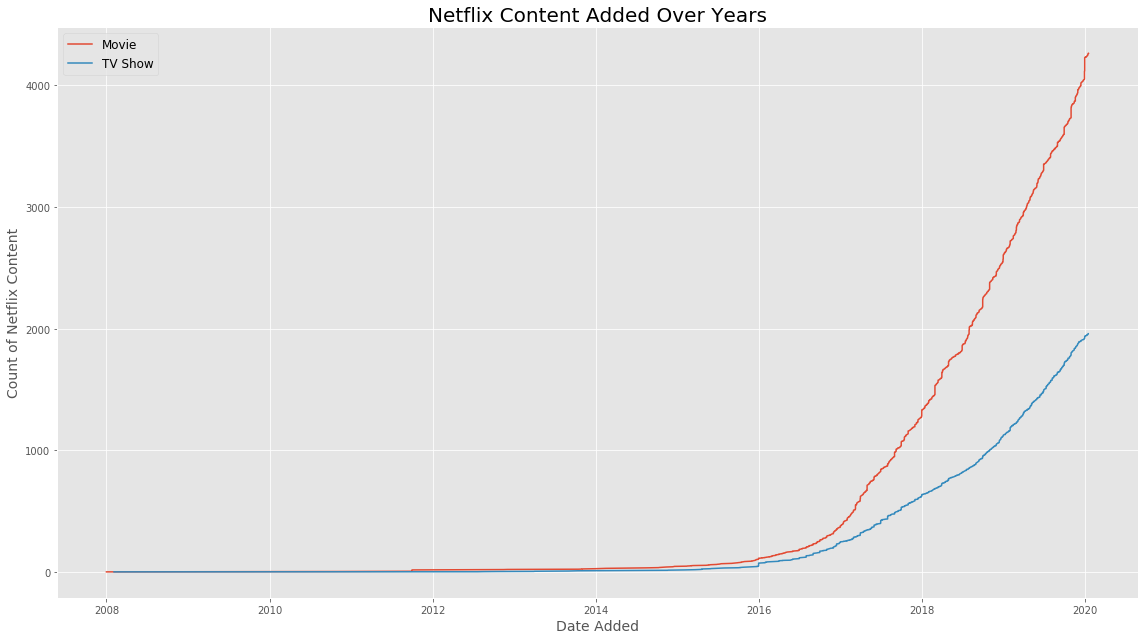

In [14]:
# ---------------------------------------------------------------------------------------------------------
# Draw time series graph to understand how many TV shows and movies were added to Netflix library over time
# ---------------------------------------------------------------------------------------------------------

# Prepare Data

# Drop the rows for which there are no 'date_added' values, sort the table with ascending order of date
netflix_time_df = netflix_df.loc[:,['type','date_added']]
netflix_time_df = netflix_time_df.dropna(subset=['date_added'])
netflix_time_df = netflix_time_df.sort_values(["date_added"], ascending=True)
netflix_time_df['count'] = 1

tmp_mov = netflix_time_df.loc[netflix_time_df['type'] == 'Movie']
tmp_tv = netflix_time_df.loc[netflix_time_df['type'] == 'TV Show']

# Draw

plt.figure(figsize=(16,9))

plt.plot(tmp_mov['date_added'], tmp_mov['count'].cumsum(), label='Movie')
plt.plot(tmp_tv['date_added'], tmp_tv['count'].cumsum(), label='TV Show')

plt.legend(loc='upper left', prop={'size': 12})
plt.title('Netflix Content Added Over Years', fontdict = {'fontsize' : 20})
plt.xlabel('Date Added', fontdict = {'fontsize' : 14})
plt.ylabel('Count of Netflix Content', fontdict = {'fontsize' : 14})
plt.tight_layout()

# Save and Show

plt.savefig("Output/netflix_content_timeseries_linegraph.jpg")
plt.show()

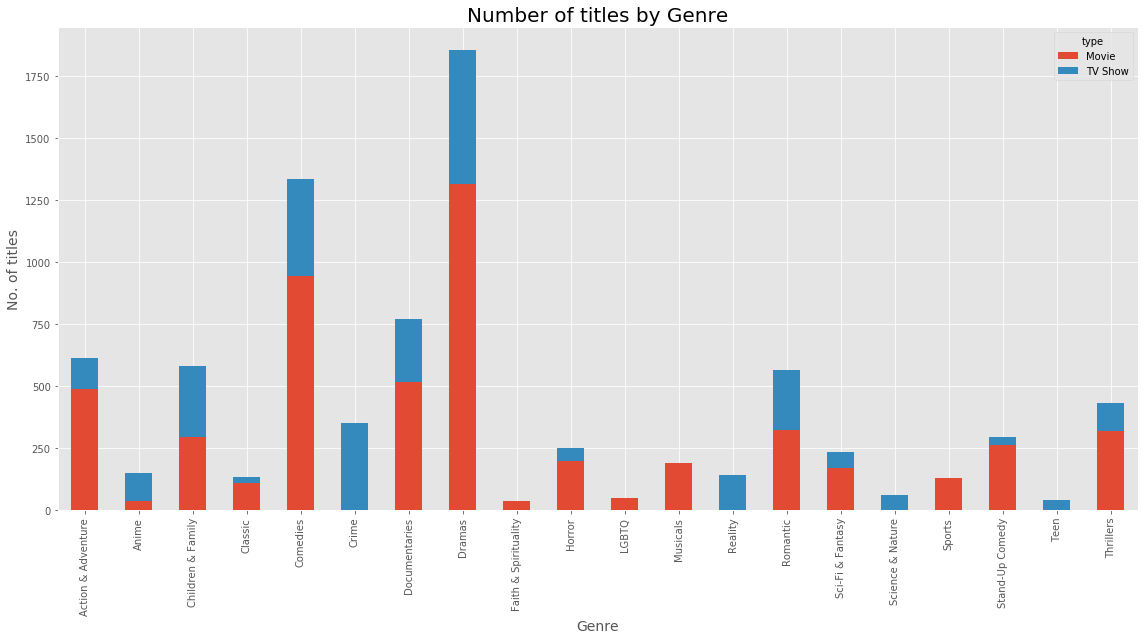

In [15]:
# -------------------------------------------------------
# Draw bar graphs to show number of titles for each genre
# -------------------------------------------------------

# Create imdb_df with imdb ratings and other columns for analysis with imdb ratings
def unnesting(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx
    return df1.join(df.drop(explode, 1), how='left')

imdb_df = netflix_df.loc[:,['IMDb_rating', 'type', 'genre']]
#imdb_df = imdb_df.dropna(axis=0, how='any')
imdb_df = unnesting(imdb_df,['genre'])

# Prepare Data

imdb_plot_df = imdb_df.groupby(['genre','type']).count().reset_index()
pivot_df = imdb_plot_df.pivot(index='genre', columns='type', values='IMDb_rating')

# Draw

pivot_df.plot.bar(stacked=True, figsize=(16,9))

plt.title('Number of titles by Genre', fontdict = {'fontsize' : 20})
plt.xlabel('Genre', fontdict = {'fontsize' : 14})
plt.ylabel('No. of titles', fontdict = {'fontsize' : 14})
plt.tick_params(axis = 'both', labelsize = 10)
plt.tight_layout()

# Save and Show

plt.savefig("Output/netflix_no_of_titles_genre.jpg")
plt.show()

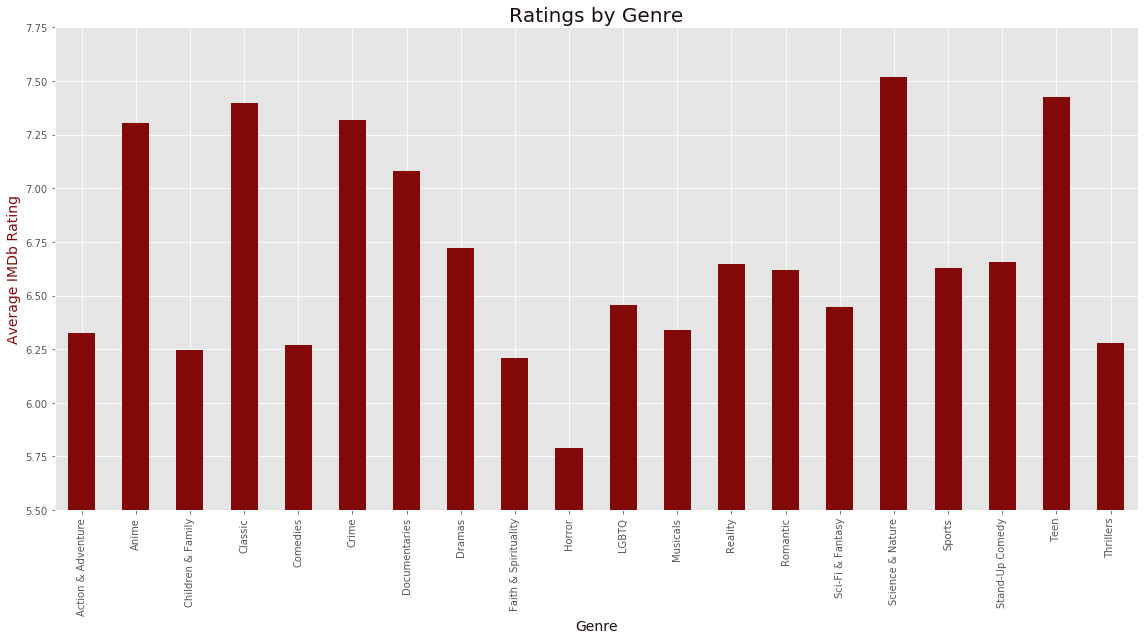

In [16]:
# -----------------------------------------------------------
# Draw bar graphs to show average IMDb ratings for each genre
# -----------------------------------------------------------

# Prepare Data

imdb_plot_df = imdb_df.groupby(['genre']).mean()

# Draw

imdb_plot_df.plot(kind='bar', legend=False, figsize=(16,9), color = c_maroon)

plt.title('Ratings by Genre', fontdict = {'fontsize' : 20}, color = c_black)
plt.xlabel('Genre', fontdict = {'fontsize' : 14}, color = c_black)
plt.ylabel('Average IMDb Rating', fontdict = {'fontsize' : 14}, color = c_maroon)
plt.ylim(5.5, 7.75)
plt.tight_layout()

# Save and Show

plt.savefig("Output/netflix_genre_imdb.jpg")
plt.show()

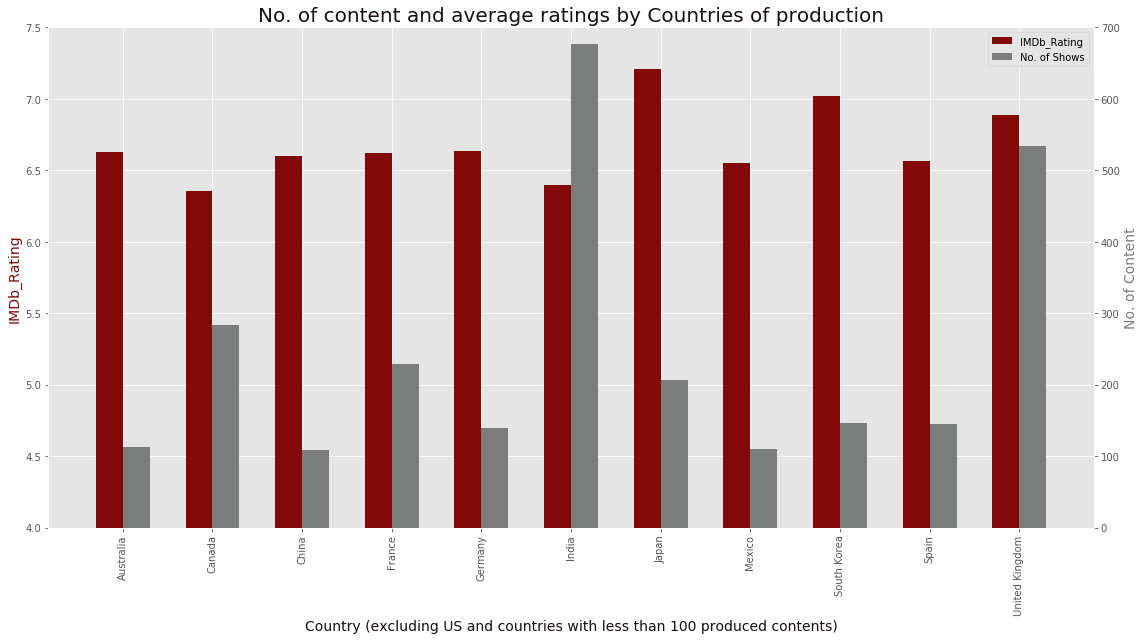

In [17]:
# ---------------------------------------------------------------------------------------------------------------------------
# Calculate the average IMDb ratings based on their country of production and identify which country produces the best titles
# ---------------------------------------------------------------------------------------------------------------------------

# Prepare Data

country_df = netflix_df.loc[:,['IMDb_rating', 'country']]
country_df = country_df.dropna(axis=0, how='any')
country_df = unnesting(country_df,['country'])
country_df['IMDb_rating'] = country_df['IMDb_rating'].astype(float)
country_df['country'] = country_df['country'].str.replace(',','')
temp_df = country_df.groupby(['country']).mean()
temp_df['No. of Shows'] = country_df.groupby(['country']).count()
country_plot_df = temp_df.loc[(temp_df['No. of Shows'] > 100) & (temp_df.index != 'United States')]

# Draw

fig, ax = plt.subplots(figsize=(16,9))

width = 0.3
x = np.arange(country_plot_df.count()[0])
plt.xticks(x + width /2, country_plot_df.index, rotation='vertical')

ax2 = ax.twinx()

imdb = ax.bar(x,country_plot_df['IMDb_rating'], width=0.3, color = c_maroon, align='center')
show = ax2.bar(x + width, country_plot_df['No. of Shows'], width = 0.3, color = c_light_grey, align='center')

plt.title('No. of content and average ratings by Countries of production', fontdict = {'fontsize' : 20}, color = c_black)
ax.set_xlabel("Country (excluding US and countries with less than 100 produced contents)", color = c_black, fontsize=14)
ax.set_ylabel("IMDb_Rating", color = c_maroon, fontsize=14)
ax2.set_ylabel("No. of Content", color = c_light_grey, fontsize=14)
plt.legend([imdb, show],['IMDb_Rating', 'No. of Shows'])

ax.set_ylim((4, 7.5))
ax2.set_ylim((0, 700))

ax2.grid(False)
plt.tight_layout()

# Save and Show

plt.savefig("Output/netflix_country_imdb.jpg")
plt.show()